# EDA: Hotel booking demand

source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017".

The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Variables:
* `hotel` - Hotel (H1 = Resort Hotel or H2 = City Hotel)
* `is_canceled` - Value indicating if the booking was canceled (1) or not (0)
* `lead_time` - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* `arrival_date_year` - Year of arrival date
* `arrival_date_month` - Month of arrival date
* `arrival_date_week_number` - Week number of year for arrival date
* `arrival_date_day_of_month` - Day of arrival date
* `stays_in_weekend_nights` - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* `stays_in_week_nights` - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* `adults` - Number of adults
* `children` - Number of children
* `babies` - Number of babies
* `meal` - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
* `country` - Country of origin. Categories are represented in the ISO 3155–3:2013 format
* `market_segment` - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* `distribution_channel` - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” 
* `is_repeated_guest` - Value indicating if the booking name was from a repeated guest (1) or not (0)
* `previous_cancellations` - Number of previous bookings that were cancelled by the customer prior to the current booking
* `previous_bookings_not_canceled` - Number of previous bookings not cancelled by the customer prior to the current booking
* `reserved_room_type` - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* `assigned_room_type` - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due o hotel operation reasons (e.g.overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
* `booking_changes` - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
* `deposit_type` - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: NoDeposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* `agent` - ID of the travel agency that made the booking
* `company` -  ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reason
* `days_in_waiting_list` - Number of days the booking was in the waiting list before it was confirmed to the customer
* `customer_type` - ype of booking, assuming one of fourcategories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* `adr` - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* `required_car_parking_spaces` - Number of car parking spaces required by the customer
* `total_of_special_requests` - Number of special requests made by the customer (e.g. twin bed or high floor)
* `reservation_status` - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
* `reservation_status_date` - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the

## Missing values

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Unique values

In [3]:
df.apply(lambda x: len(x.unique()))

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [4]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

In [5]:
# "meal" contains values "Undefined", which is equal to SC.
df["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(df.loc[df["adults"] + df["children"] + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

In [6]:
df_resort = df.loc[df['hotel'] == "Resort Hotel"]
df_city = df.loc[df['hotel'] == "City Hotel"]

In [7]:
df_resort.shape, df_city.shape

((40047, 32), (79163, 32))

## Questions:
* Where do guests come from?
* How much do guests pay for a room per night?
* How does the price per night vary over the year?
* Which are the most busy month?
* How long do people stay at the hotels?
* Bookings by market segment
* How many bookings were canceled?
* Which month have the highest number of cancelations?


## Which hotel is more popular?

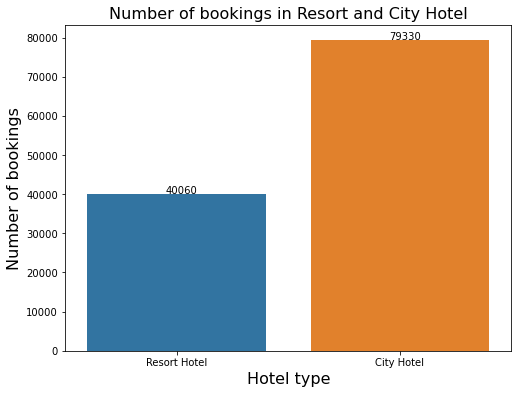

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x ="hotel")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+100))

plt.title("Number of bookings in Resort and City Hotel", fontsize=16)
plt.xlabel("Hotel type", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

## How frequently reservations are canceled?

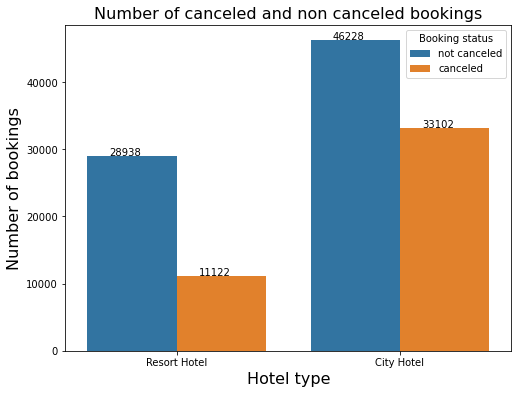

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x ="hotel", hue="is_canceled")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))

plt.title("Number of canceled and non canceled bookings", fontsize=16)
plt.xlabel("Hotel type", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.legend(title="Booking status", labels=["not canceled", "canceled"])
plt.show()

In [86]:
print(f"Total cancelations: {df['is_canceled'].sum()} ({df['is_canceled'].mean()*100:.2f}%)")
print(f"Resort hotel cancelations: {df[df['hotel'] == 'Resort Hotel']['is_canceled'].sum()} ({df[df['hotel'] == 'Resort Hotel']['is_canceled'].mean()*100:.2f}%)")
print(f"City hotel cancelations: {df[df['hotel'] == 'City Hotel']['is_canceled'].sum()} ({df[df['hotel'] == 'City Hotel']['is_canceled'].mean()*100:.2f}%)")

Total cancelations: 44224 (37.04%)
Resort hotel cancelations: 11122 (27.76%)
City hotel cancelations: 33102 (41.73%)


## How deposit type affects on cancelation? 

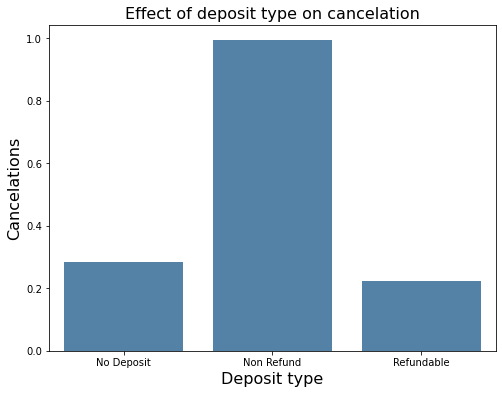

In [61]:
data_to_plot = df.groupby("deposit_type")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=data_to_plot.index, y=data_to_plot.values, color="steelblue")
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations", fontsize=16)
plt.title("Effect of deposit type on cancelation", fontsize=16)
plt.show()

In [50]:
df["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

* NoDeposit – no deposit was made; 
* Non Refund – a deposit was made in the value of the total stay cost;
* Refundable – a deposit was made with a value under the total cost of stay.

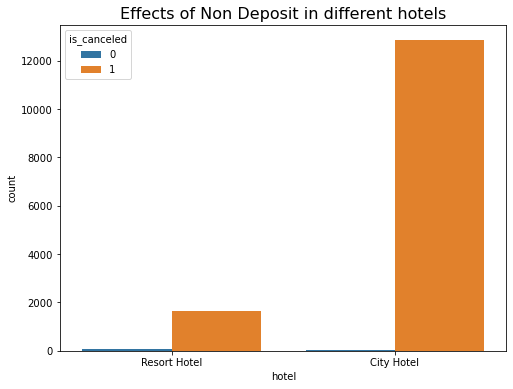

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df["deposit_type"] == "Non Refund"], x="hotel", hue="is_canceled")
plt.title("Effects of Non Deposit in different hotels", fontsize=16)
plt.show()

## How `lead_time` affects on cancelations?

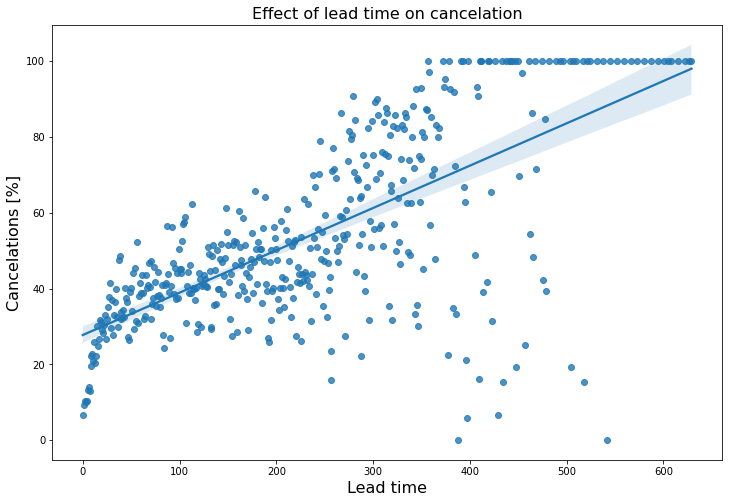

In [13]:
# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

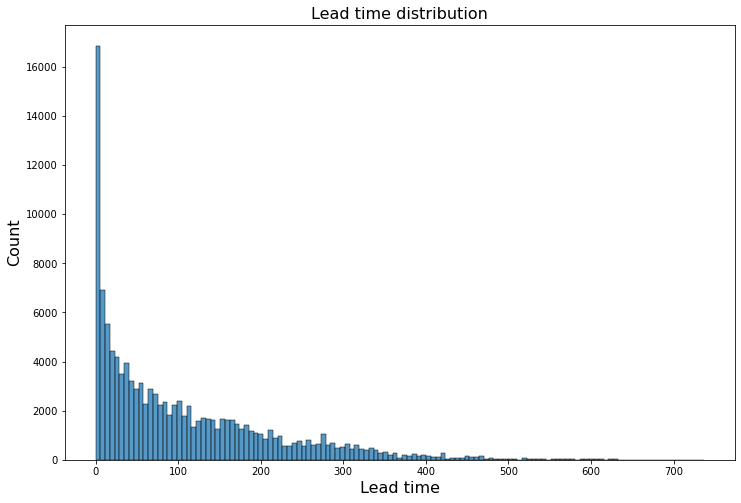

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(x='lead_time', data=df)
plt.title("Lead time distribution", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Count", fontsize=16)
# plt.xlim(0,365)
plt.show()

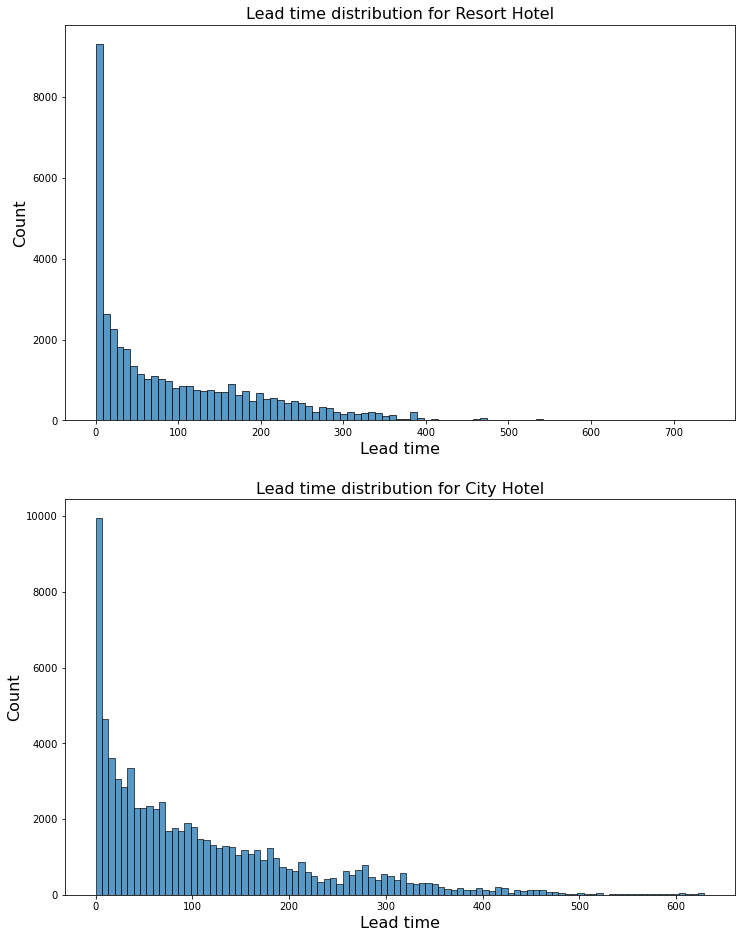

In [15]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
sns.histplot(x='lead_time', data=df_resort)
plt.title("Lead time distribution for Resort Hotel", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Count", fontsize=16)
# plt.xlim(0,365)

plt.subplot(2, 1, 2)
sns.histplot(x='lead_time', data=df_city)
plt.title("Lead time distribution for City Hotel", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Count", fontsize=16)
# plt.xlim(0,365)
plt.show()

## Where are the guests from?

Text(0, 0.5, 'Number of bookings')

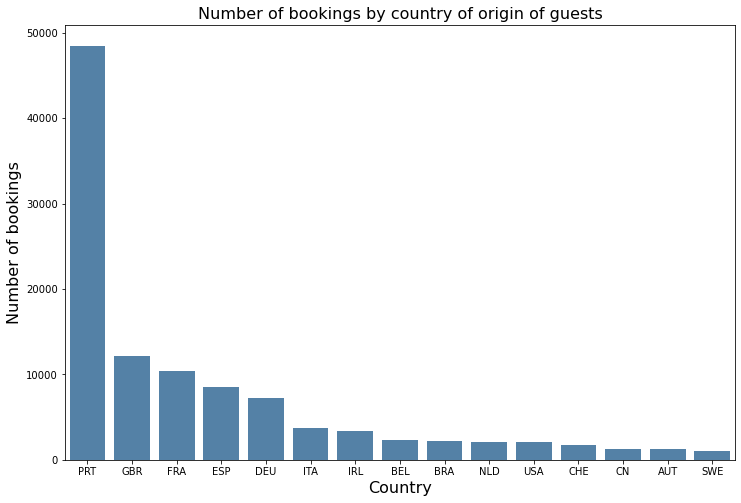

In [22]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x="country", order = pd.value_counts(df['country']).iloc[:15].index, color="steelblue")
plt.title("Number of bookings by country of origin of guests", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)

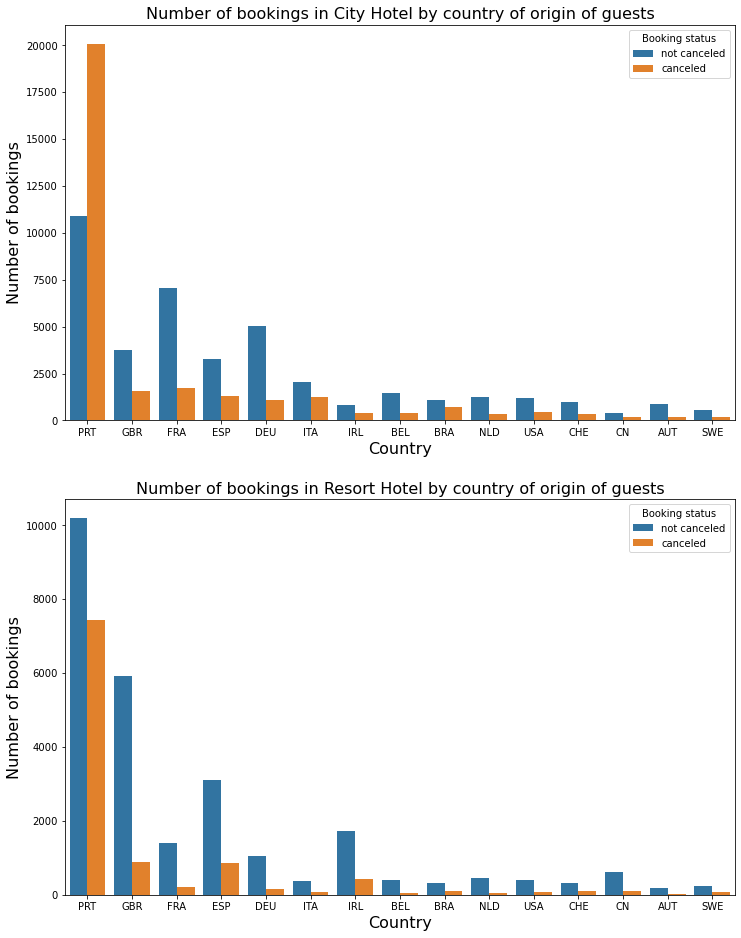

In [119]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
sns.countplot(data=df[df["hotel"]=="City Hotel"], x="country", hue="is_canceled", order = pd.value_counts(df['country']).iloc[:15].index)
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Number of bookings in City Hotel by country of origin of guests", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)

plt.subplot(2, 1, 2)
sns.countplot(data = df[df["hotel"] == "Resort Hotel"], x = "country", hue = "is_canceled", 
              order = pd.value_counts(df['country']).iloc[:15].index)
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Number of bookings in Resort Hotel by country of origin of guests", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

## Which month have the highest number of cancelations?

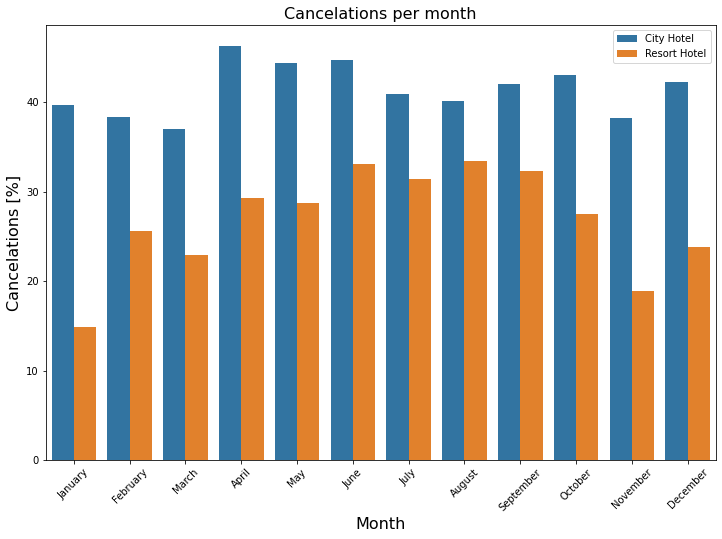

In [156]:
# Create a DateFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

## Which are the most busy months?

In [157]:
bookings_monthly = df[["hotel", "arrival_date_month", "arrival_date_year", "is_canceled", "adr"]]
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
bookings_monthly.loc[:,"arrival_date_month"] = pd.Categorical(bookings_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

In [158]:
bookings_monthly = bookings_monthly.groupby(["hotel", "arrival_date_month", "is_canceled"]).size().reset_index(name='counts')
#w ramce dane za lipiec i sierpień występują 3 razy, za pozostałe miesiące - 2 razy
bookings_monthly.loc[(bookings_monthly["arrival_date_month"] == "July") | (bookings_monthly["arrival_date_month"]  == "August"),
                    "counts"] /= 3
bookings_monthly.loc[~((bookings_monthly["arrival_date_month"] == "July") | (bookings_monthly["arrival_date_month"]  == "August")),
                    "counts"] /= 2

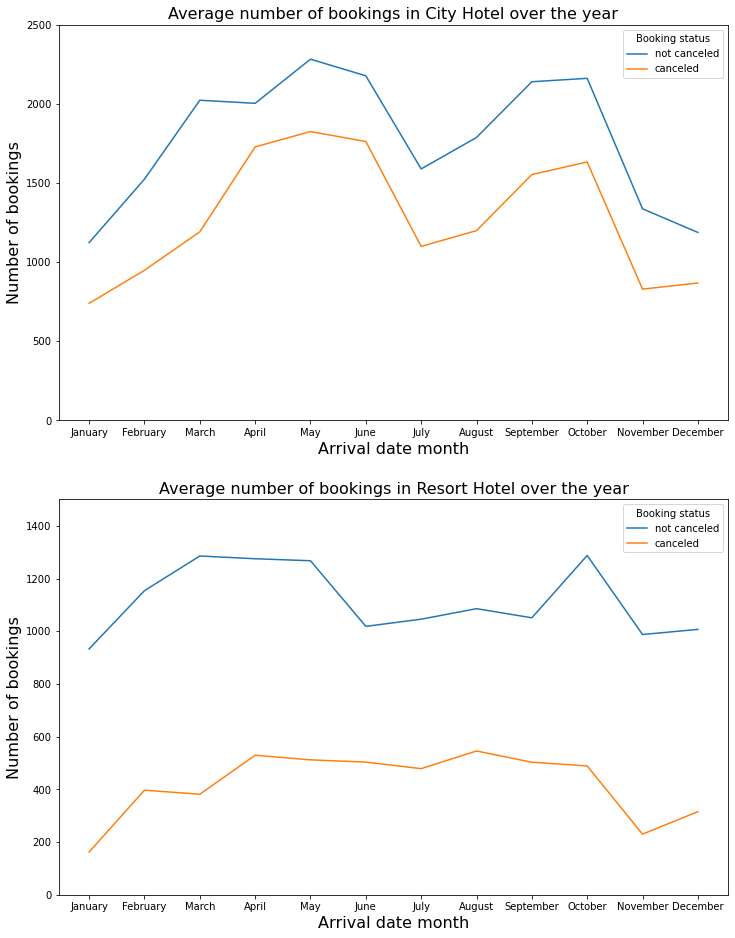

In [160]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
plt.ylim(0, 2500)
sns.lineplot(data=bookings_monthly[bookings_monthly["hotel"] == "City Hotel"], x = "arrival_date_month", y="counts", hue="is_canceled")
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Average number of bookings in City Hotel over the year", fontsize=16)
plt.xlabel("Arrival date month", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)

plt.subplot(2, 1, 2)
plt.ylim(0, 1500)
sns.lineplot(data=bookings_monthly[bookings_monthly["hotel"] == "Resort Hotel"], x = "arrival_date_month", y="counts", hue="is_canceled")
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Average number of bookings in Resort Hotel over the year", fontsize=16)
plt.xlabel("Arrival date month", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

## How does the price per night vary over the year?

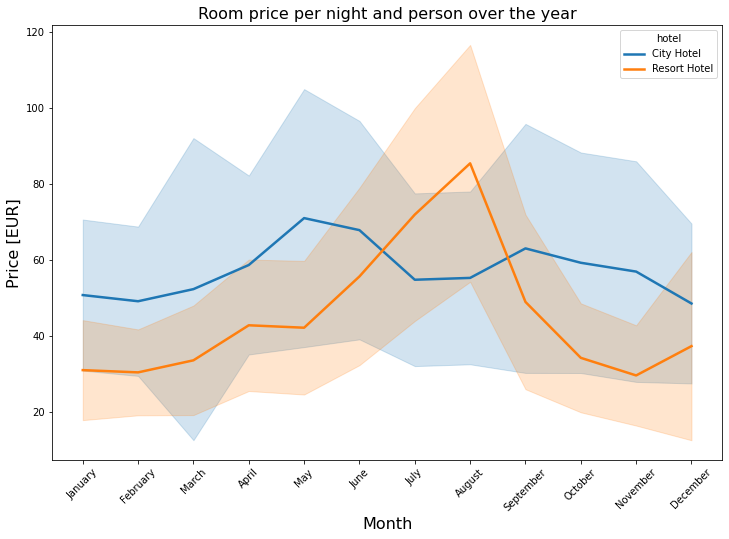

In [165]:
# grab data:
room_prices_mothly = df[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

## How much do guests pay for a room per night?

In [154]:
# Counting adults and children as paying guests only, not babies.
df_resort['adr_pp'] = df_resort['adr'] / (df_resort['adults'] + df_resort['children'])
df_city['adr_pp'] = df_city['adr'] / (df_city['adults'] + df_city['children'])

print(f"""
Resort hotel: {df_resort['adr_pp'].mean():.2f} € per night and person.
City hotel: {df_city['adr_pp'].mean():.2f} € per night and person.
""")


Resort hotel: 48.48 € per night and person.
City hotel: 58.49 € per night and person.



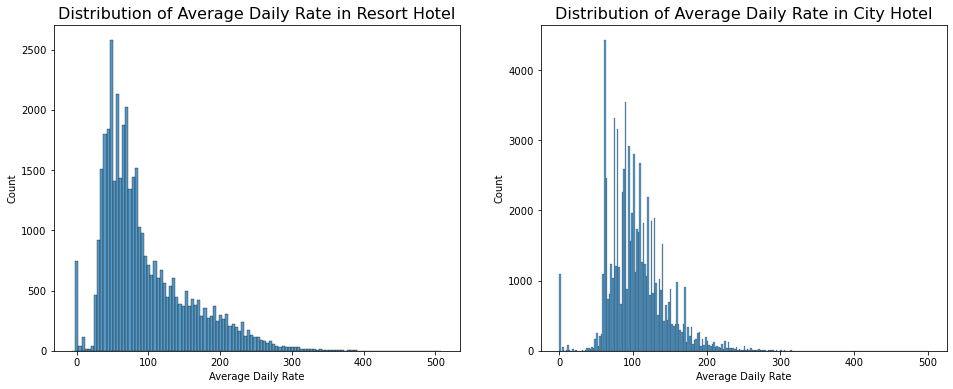

In [153]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df_resort, x='adr')
plt.xlabel("Average Daily Rate")
plt.title("Distribution of Average Daily Rate in Resort Hotel", fontsize=16)

plt.subplot(1, 2, 2)
sns.histplot(data=df_city, x='adr', binrange=(0, 500)) # note that we have outliers b
plt.xlabel("Average Daily Rate")
plt.title("Distribution of Average Daily Rate in City Hotel", fontsize=16)
plt.show()

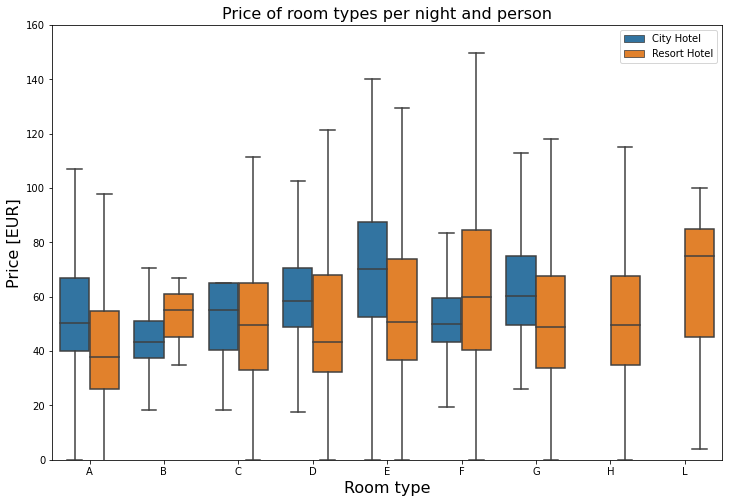

In [155]:
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
# full_data_guests = df.loc[df["is_canceled"] == 0] # only actual gusts
# room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices = df[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type", y="adr_pp", hue="hotel", data=room_prices, hue_order=["City Hotel", "Resort Hotel"], fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

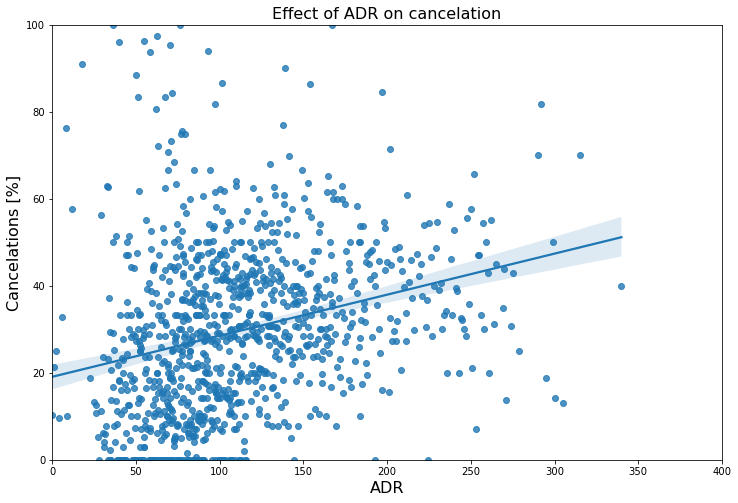

In [23]:
# group data for adr:
adr_cancel_data = df.groupby("adr")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
adr_cancel_data_10 = adr_cancel_data.loc[adr_cancel_data["count"] >= 10]


#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data_10.index, y=adr_cancel_data_10["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

## How long do people stay at the hotels?

In [161]:
df_resort["total_nights"] = df_resort["stays_in_weekend_nights"] + df_resort["stays_in_week_nights"]
df_city["total_nights"] = df_city["stays_in_weekend_nights"] + df_city["stays_in_week_nights"]
resort_plot = df_resort.groupby(['total_nights', "is_canceled"]).size().reset_index()
city_plot = df_city.groupby(['total_nights', "is_canceled"]).size().reset_index()

C:\Users\mikol\AppData\Local\Temp/ipykernel_7232/1343945696.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


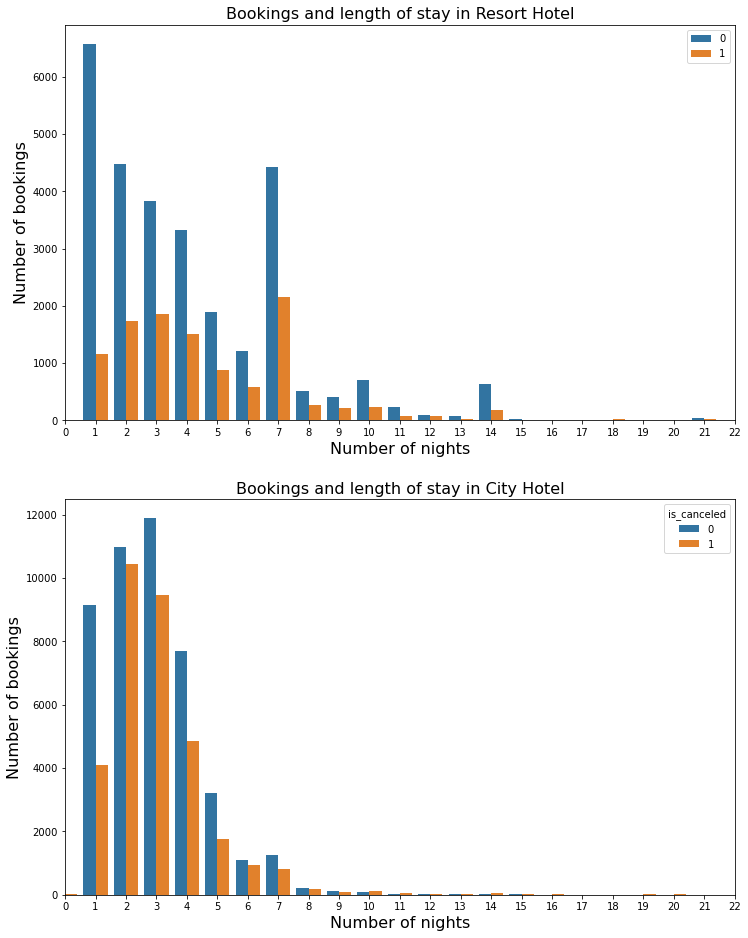

In [167]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
sns.barplot(x = "total_nights", y = 0, hue="is_canceled", data=resort_plot)
plt.xlim(0,22)
plt.title("Bookings and length of stay in Resort Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.legend()


plt.subplot(2, 1, 2)
sns.barplot(x = "total_nights", y = 0, hue="is_canceled", data=city_plot)
plt.title("Bookings and length of stay in City Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.xlim(0,22)
plt.show()

In [170]:
resort_plot = df_resort.groupby(['total_nights']).size().reset_index()
city_plot = df_city.groupby(['total_nights']).size().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\mikol\AppData\Local\Temp/ipykernel_7232/2395715285.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


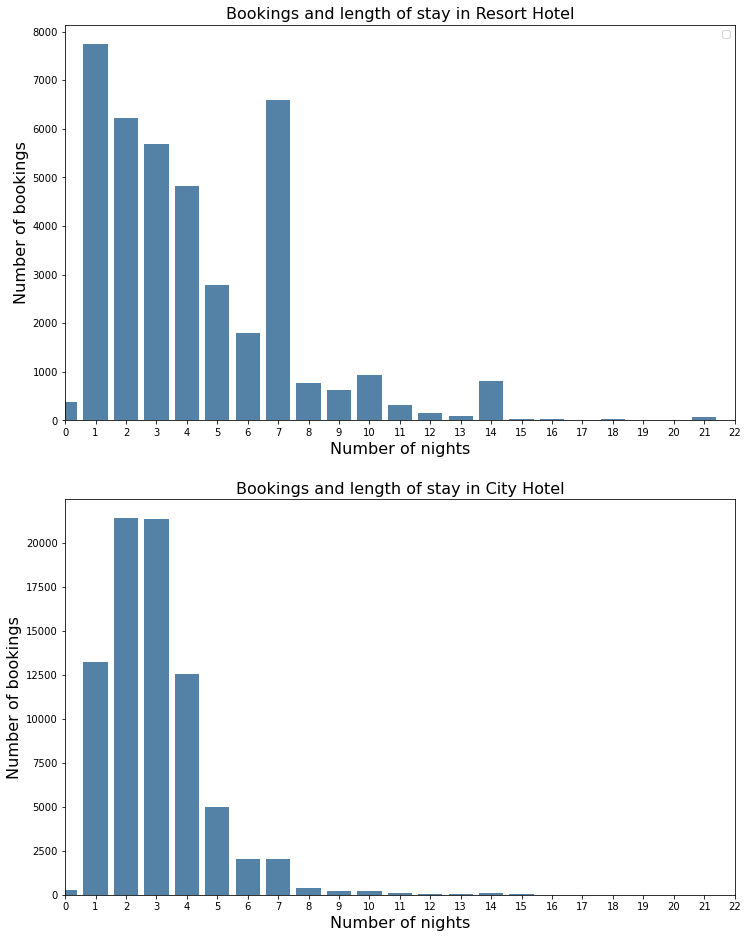

In [174]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
sns.barplot(x = "total_nights", y = 0, data=resort_plot, color='steelblue')
plt.xlim(0,22)
plt.title("Bookings and length of stay in Resort Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.legend()


plt.subplot(2, 1, 2)
sns.barplot(x = "total_nights", y = 0, data=city_plot, color='steelblue')
plt.title("Bookings and length of stay in City Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.xlim(0,22)
plt.show()

## Does assignment to a different room type have a significant impact on cancellations?

In [98]:
print(f'Different type: {df.loc[(df["reserved_room_type"] != df["assigned_room_type"]), "is_canceled"].mean()}')
print(f'Same type: {df.loc[(df["reserved_room_type"] == df["assigned_room_type"]), "is_canceled"].mean()}')

Different type: 0.05376416169471073
Same type: 0.41562891847654415


A: Not really

## Are trips with children more likely to be cancelled?

In [97]:
print(f"Without children: {df.loc[df['babies'] + df['children'] == 0, 'is_canceled'].mean():.3f}")
print(f'With children: {df.loc[df["babies"] + df["children"] != 0, "is_canceled"].mean():.3f}')

Without children: 0.372
With children: 0.350


A: No

## Are repeated guests less likely make cancelations?

In [96]:
print(f"Non repeated guest: {df.loc[df['is_repeated_guest'] == 0, 'is_canceled'].mean():.3f}")
print(f'Repeated guest: {df.loc[df["is_repeated_guest"] == 1, "is_canceled"].mean():.3f}')

Non repeated guest: 0.378
Repeated guest: 0.145


A: Yes

## Correlations

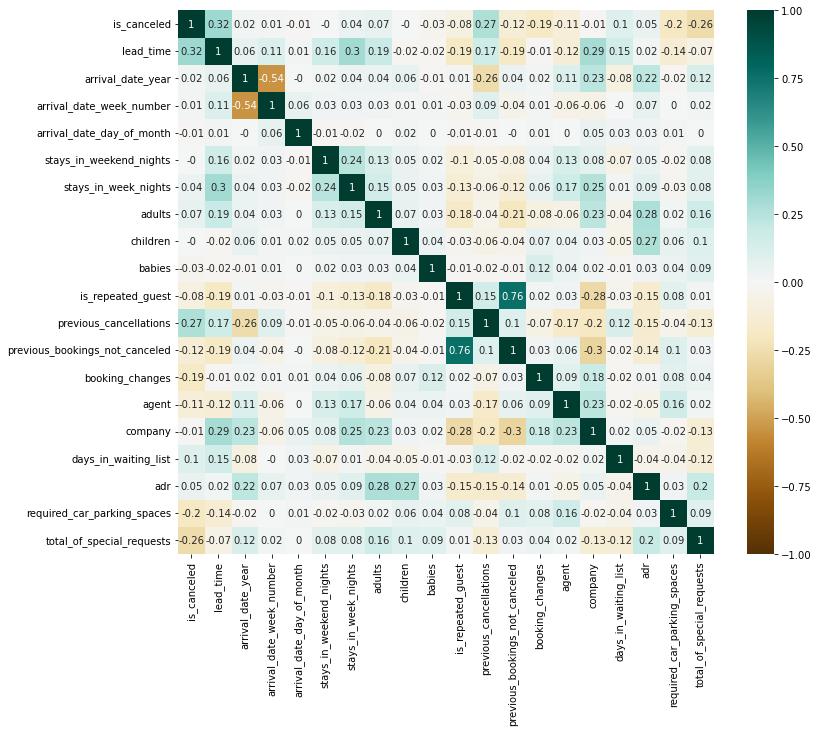

In [43]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(method='spearman').round(2), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

In [40]:
df.corr(method='spearman')['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.316635
previous_cancellations            0.270233
total_of_special_requests         0.258520
required_car_parking_spaces       0.197397
booking_changes                   0.185107
previous_bookings_not_canceled    0.115354
agent                             0.114970
days_in_waiting_list              0.098237
is_repeated_guest                 0.084793
adults                            0.067027
adr                               0.050876
stays_in_week_nights              0.041418
babies                            0.034306
arrival_date_year                 0.018066
company                           0.011338
arrival_date_week_number          0.007589
arrival_date_day_of_month         0.006142
stays_in_weekend_nights           0.004106
children                          0.002791
Name: is_canceled, dtype: float64

## autoEDA: `pandas-profiling`

In [8]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df.sample(frac=0.1), title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]